In [2]:
# Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
#looking at the first 5 values of the dataset
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
#Spliting the dataset in independent and dependent variables
X = dataset.loc[:, ['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values

numpy.ndarray

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [23]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Apoorv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logisticregression = LogisticRegression()
logisticregression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

<class 'numpy.ndarray'>


In [62]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([[0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0]], dtype=int64)

In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('true negatives (TN): Both, actual and predicted values are false: ', cm[0,0])
print('true positives (TP): Both, actual and predicted values are true: ', cm[1,1])
print('false positives (FP): Predicted value is yes but actual is false: ', cm[0,1])
print('false negative (FN): Predicted value is no but actual is true: ', cm[1,0])

[[50  2]
 [ 7 21]]
true negatives (TN): Both, actual and predicted values are false:  50
true positives (TP): Both, actual and predicted values are true:  21
false positives (FP): Predicted value is yes but actual is false:  2
false negative (FN): Predicted value is no but actual is true:  7


In [58]:
#calculating the AUC value for the classifier model
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
print('The AUC value for the trained classifer on the test set is: ', metrics.auc(fpr, tpr))

The AUC value for the trained classifer on the test set is:  0.855769230769


In [60]:
#Computing Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
from sklearn.metrics import roc_auc_score
print('Area under the ROC Curve: ' , roc_auc_score(y_test, y_pred))

Area under the ROC Curve:  0.855769230769


In [61]:
# Computing Average precision score from predicted scores
from sklearn.metrics import average_precision_score
print('The Average Precision score for logistic clasifier is: ',average_precision_score(y_test, y_pred) )

The Average Precision score for logistic clasifier is:  0.772282608696


# Visualziation

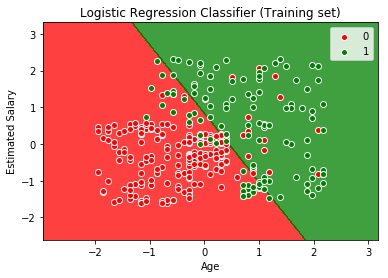

In [89]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X, Y = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

probs = classifier.predict(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
plt.contourf(X, Y, probs, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, edgecolor="white")

plt.title('Logistic Regression Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


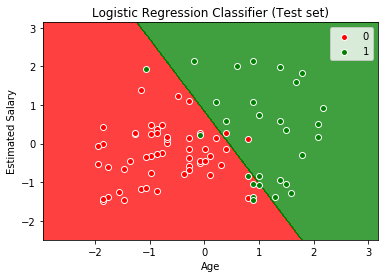

In [91]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
probs = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, probs, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, edgecolor="white")

plt.title('Logistic Regression Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()